# Configure a Gardenia tree

In [1]:
import mygardenia.configure

In [2]:
working_dir = '../../examples/my-example'

## Either via the use of TOML files

In [3]:
help(mygardenia.configure.GardeniaTree.__init__)

Help on function __init__ in module mygardenia.configure:

__init__(self, catchment: str = None, settings: str = None)
    Initialise a configuration tree gathering all the settings
     and parameters for the Gardenia model.
    
    :Parameters:
    
        catchment: `str`, optional
            The path to the TOML file containing the information about
            the simulation data for the catchment to simulate.
    
        settings: `str`, optional
            The path to the TOML file containing the settings and
            the parameters configuring the simulation with the
            Gardenia model.
    
    :Returns:
    
        `GardeniaTree`
    
    **Examples**
    
    Generating a configuration tree with default values:
    
    >>> t = GardeniaTree()
    
    Generating a configuration tree with default values except for
    those settings and parameters whose values are contained in the
    given TOML files:
    
    >>> t = GardeniaTree(
    ...     catchment='exa

In [4]:
tree = mygardenia.configure.GardeniaTree(
    catchment=f'{working_dir}/config/bassin.toml',
    settings=f'{working_dir}/config/reglages.toml',
)

## Or via a nested dictionary

In [5]:
tree = mygardenia.configure.GardeniaTree()

In [6]:
help(tree.update)

Help on method update in module mygardenia.configure:

update(updates: dict) method of mygardenia.configure.GardeniaTree instance
    Update the existing values in the configuration tree.
    
    :Parameters:
    
        updates: `dict`
            The configuration updates to overwrite the existing
            values contained in the Gardenia tree.
    
    :Returns:
    
        `None`
    
    **Examples**
    
    Generating a configuration tree with default values, then
    updating some of the default values it contains:
    
    >>> t = GardeniaTree()
    >>> t.update(
    ...     {
    ...         'data': {
    ...             'simulation': {
    ...                 'rainfall': 'pluie.prn',
    ...                 'pet': 'etp.prn'
    ...             },
    ...             'observation': {
    ...                 'streamflow': 'debit.prn',
    ...                 'piezo-level': 'niveau.prn'
    ...             }
    ...         }
    ...     }
    ... )
    
    Generating a 

In [7]:
tree.update(
    {
        'data': {
            'simulation': {
                'rainfall': 'pluie.prn',
                'pet': 'etp.prn'
            },
            'observation': {
                'streamflow': 'debit.prn',
                'piezo-level': 'niveau.prn'
            }
        },
        'description': {
            'project': "example run",
            'basin': "example",
        },
        'general_settings': {
            'user_profile': '0',
            'execution_mode': 'M',
            'streamflow_obs_weight': 5,
            'piezo-level_obs_weight': 2,
            'calc_streamflow': True,
            'calc_piezo-level': True,
            'save_recharge_effective-rainfall': True,
            'save_streamflow_piezo-level': True,
            'save_water-balance': False,
            'computation_scheme': '0'
        },
        'basin_settings': {
            'model': {
                'initialisation': {
                    'spinup': {
                        'n_years': 4,
                        'n_cycles': 1
                    }
                },
                'calibration': {
                    'max_iterations': 250
                }
            },
            'time': {
                'simulation': {
                    'first_year': 1985
                }
            }
        },
        'physical_parameters': {
            'basin_area': {
                'val': 524
            },
            'pumping_groundwater_half-life_rise': {
                'val': 0.0,
                'opt': False,
                'min': 0.05,
                'max': 10.0
            }
        }
    }
)

# Initialise a Gardenia model

In [8]:
import mygardenia.simulate

In [9]:
help(mygardenia.simulate.GardeniaModel.__init__)

Help on function __init__ in module mygardenia.simulate:

__init__(self, tree: mygardenia.configure.GardeniaTree, working_dir: str)
    Initialise a wrapper for a simulation with the Gardenia model.
    
    :Parameters:
    
        tree: `GardeniaTree`
            The Gardenia tree containing all the settings and parameters
            to be given to the Gardenia model.
    
        working_dir: `str`
            The path to the directory containing the simulation data,
            the potential configuration files and the future simulation
            output.
    
    :Returns:
    
        `GardeniaModel`
    
    **Examples**
    
    >>> t = GardeniaTree()
    >>> m = GardeniaModel(t, working_dir='examples/my-example')


In [10]:
model = mygardenia.simulate.GardeniaModel(tree, working_dir)

# Run a simulation

In [11]:
help(model.run)

Help on method run in module mygardenia.simulate:

run(execution_mode: str = 'M', save_outputs: bool = True, _verbose: bool = False) method of mygardenia.simulate.GardeniaModel instance
    Run the simulation with Gardenia.
    
    :Parameters:
    
        execution_mode: `str`, optional
            The execution mode to use when calling Gardenia. It
            can be 'M' for silent or 'D' for direct. If not provided,
            silent mode is used.
    
        save_outputs: `str`, optional
            Whether to try to save the streamflow and/or piezometric
            level as separate CSV files if they are available in
            Gardenia output files. If not provided, set to True.
    
    :Returns:
    
        `None`
    
    **Examples**
    
    >>> t = GardeniaTree(
    ...     catchment='examples/my-example/config/bassin.toml',
    ...     settings='examples/my-example/config/reglages.toml'
    ... )
    >>> m = GardeniaModel(t, working_dir='examples/my-example')
    >>

In [12]:
model.run(execution_mode='M')

# Visualise model outputs

In [13]:
help(model.visualise)

Help on method visualise in module mygardenia.simulate:

visualise(variable: str, filename: str = None, fig_size: tuple = None) method of mygardenia.simulate.GardeniaModel instance
    Visualise the simulations and the observations time series
    for a given variable.
    
    :Parameters:
    
        variable: `str`
            The model variable to evaluate. It can either be
            'streamflow' or 'piezo_level'.
    
        filename: `str`, optional
            The file name to use for storing the visualisation. The
            file extension in the name will control the file format
            generated (e.g. *.pdf, *.png). If not provided, the
            visualisation is only shown and not saved as a file.
            
        fig_size: `tuple`, optional
            The width and the height of the figure as a tuple.
            If not provided, set to (10, 4).
    
    :Returns:
    
        `None`
    
    **Examples**
    
    >>> t = GardeniaTree(
    ...     catchment=

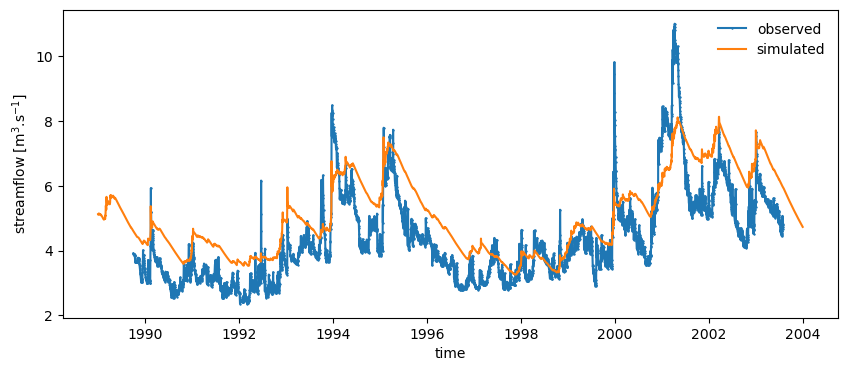

In [14]:
model.visualise(variable='streamflow')

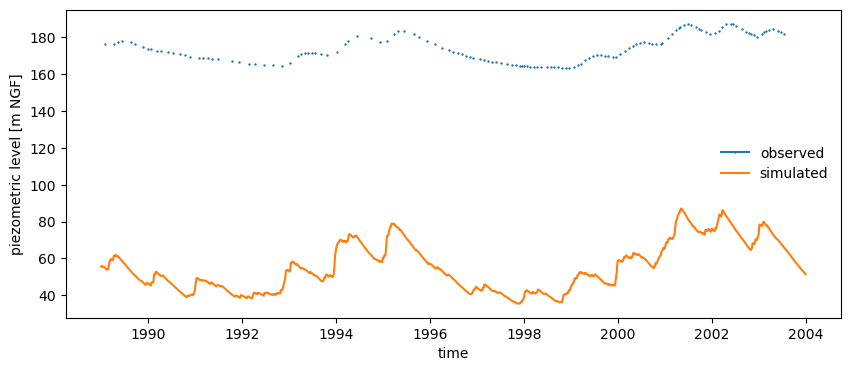

In [15]:
model.visualise(variable='piezo_level')

# Evaluation model performance

In [16]:
help(model.evaluate)

Help on method evaluate in module mygardenia.simulate:

evaluate(variable: str, metric: str, transform: str = None, exponent: float = None) method of mygardenia.simulate.GardeniaModel instance
    Evaluate the performance between the simulations and the
    observations for a given variable.
    
    :Parameters:
    
        variable: `str`
            The model variable to evaluate. It can either be
            'streamflow' or 'piezo_level'.
    
        metric: `str`
            The evaluation metric to use to compare observations and
            simulations. It can be any metric available in `evalhyd`
            (https://hydrogr.github.io/evalhyd/metrics/deterministic.html)
    
        transform: `str`, optional
            The transformation function to apply to the observations
            and the predictions before computing the metric. It can
            be 'log', 'inv', 'sqrt', 'pow'. If not provided, no
            transformation is performed.
    
        exponent: `float`

In [17]:
model.evaluate(variable='streamflow', metric='KGE')

array(0.74406113)

In [18]:
model.evaluate(variable='piezo_level', metric='NSE')

array(-260.01490503)